**DATA SOURCE:**

[NSW Housing Rent and Sales](https://www.facs.nsw.gov.au/resources/statistics/rent-and-sales/back-issues)

Sales data - renamed vs. original variable names:
* <b>dwelling_type</b>: Dwelling Type
* <b>25%_price</b>: First Quartile Sales Price (AUD 000s)
* <b>50%_price</b>: Median Sales Price (AUD 000s)
* <b>75%_price</b>: Third Quartile Sales Price (AUD 000s)
* <b>mean_prce</b>: Mean Sales Price (AUD 000s)
* <b>sales_no</b>: Number of Sales
* <b>Qdealta_median</b>: Qtly change in Median
* <b>Adealta_median</b>: Annual change in Median
* <b>Qdelta_count</b>: Qtly change in Count
* <b>Adelta_count</b>: Annual change in Count

In [63]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Sales Data

### 1-1. Data cleaning and preparation

In [2]:
s136 = "Files/Sales/Issue-136-Sales-tables-March-2021-quarter.xlsx"
s135 = "Files/Sales/Issue-135-Sales-tables-December-2020-quarter.xlsx"
s134 = "Files/Sales/Issue-134-Sales-tables-September-2020-quarter.xlsx"
s133 = "Files/Sales/Issue-133-Sales-tables-June-2020-quarter.xlsx"
s132 = "Files/Sales/Issue-132-Sales-tables-March-2020-quarter.xlsx"
s131 = "Files/Sales/Issue-131-Sales-tables-December-quarter-2019.xlsx"
s130 = "Files/Sales/Issue-130-Sales-tables-September-quarter-2019.xlsx"
s129 = "Files/Sales/Issue-129-Sales-tables-June-quarter-2019.xlsx"
s128 = "Files/Sales/Issue-128-Sales-tables-Mar-quarter-2019.xlsx"

# Read the two sheets into two separate dataframes
s136 = pd.read_excel(s136, sheet_name="Postcode", na_values='-', header=6)
s135 = pd.read_excel(s135, sheet_name="Postcode", na_values='-', header=6)
s134 = pd.read_excel(s134, sheet_name="Postcode", na_values='-', header=6)
s133 = pd.read_excel(s133, sheet_name="Postcode", na_values='-', header=6)
s132 = pd.read_excel(s132, sheet_name="Postcode", na_values='-', header=6)
s131 = pd.read_excel(s131, sheet_name="Postcode", na_values='-', header=6)
s130 = pd.read_excel(s130, sheet_name="Postcode", na_values='-', header=5)
s129 = pd.read_excel(s129, sheet_name="Postcode", na_values='-', header=4)
s128 = pd.read_excel(s128, sheet_name="Postcode", na_values='-', header=4)

# Sale prices in any geographical area where the number of sales is 10 or less were not shown for confidentiality
# They were represented as '-' in the table

print("Q1 2021(s136):", s136.shape,"\n",
      "Q4 2020(s135):", s135.shape,"\n",
      "Q3 2020(s134):", s134.shape,"\n",
      "Q2 2020(s133):", s133.shape,"\n",
      "Q1 2020(s132):", s132.shape,"\n",
      "Q4 2019(s131):", s131.shape,"\n",
      "Q3 2019(s130):", s130.shape,"\n",
      "Q2 2019(s129):", s129.shape,"\n",
      "Q1 2019(s128):", s128.shape)

Q1 2021(s136): (1427, 11) 
 Q4 2020(s135): (1459, 11) 
 Q3 2020(s134): (1419, 11) 
 Q2 2020(s133): (1332, 11) 
 Q1 2020(s132): (1361, 11) 
 Q4 2019(s131): (1382, 11) 
 Q3 2019(s130): (1377, 11) 
 Q2 2019(s129): (1356, 11) 
 Q1 2019(s128): (1332, 11)


In [3]:
# Add time period and key columns before merging

s136['key'] = 's136'
s135['key'] = 's135'
s134['key'] = 's134'
s133['key'] = 's133'
s132['key'] = 's132'
s131['key'] = 's131'
s130['key'] = 's130'
s129['key'] = 's129'
s128['key'] = 's128'

s136['time_period'] = '2021 Q1'
s135['time_period'] = '2020 Q4'
s134['time_period'] = '2020 Q3'
s133['time_period'] = '2020 Q2'
s132['time_period'] = '2020 Q1'
s131['time_period'] = '2019 Q4'
s130['time_period'] = '2019 Q3'
s129['time_period'] = '2019 Q2'
s128['time_period'] = '2019 Q1'

s136['year'] = '2021'
s135['year'] = '2020'
s134['year'] = '2020'
s133['year'] = '2020'
s132['year'] = '2020'
s131['year'] = '2019'
s130['year'] = '2019'
s129['year'] = '2019'
s128['year'] = '2019'

s136['quarter'] = '1'
s135['quarter'] = '4'
s134['quarter'] = '3'
s133['quarter'] = '2'
s132['quarter'] = '1'
s131['quarter'] = '4'
s130['quarter'] = '3'
s129['quarter'] = '2'
s128['quarter'] = '1'

In [5]:
# Merge sales file into one master file
frames = [s128, s129, s130, s131, s132, s133, s134, s135, s136]
s_master = pd.concat(frames)

# Check master sales data's shape and dtypes
print("s_master:", s_master.shape, "\n")
print(s_master.dtypes)

s_master: (12445, 15) 

Postcode                                int64
Dwelling Type                          object
First Quartile Sales Price\n$'000s    float64
Median Sales Price\n$'000s            float64
Third Quartile Sales Price\n'000s     float64
Mean Sales Price\n$'000s              float64
Sales\nNo.                             object
Qtly change in Median                 float64
Annual change in Median               float64
Qtly change in Count                  float64
Annual change in Count                float64
key                                    object
time_period                            object
year                                   object
quarter                                object
dtype: object


In [6]:
# Rename column for easier referencing
rename_cols= {'Postcode':'postcode', 
             'Dwelling Type':'dwelling_type', 
             "First Quartile Sales Price\n$'000s" : '25%_price',
             "Median Sales Price\n$'000s" : '50%_price', 
             "Third Quartile Sales Price\n'000s" : '75%_price',
             "Mean Sales Price\n$'000s" : 'mean_price',
             'Sales\nNo.':'sales_no',
             'Qtly change in Median':'Qdelta_median',
             'Annual change in Median':'Adelta_median',
             'Qtly change in Count':'Qdelta_count',
             'Annual change in Count':'Adelta_count'}

s_master.rename(columns=rename_cols, inplace=True)
s_master.head(5)

,postcode,dwelling_type,25%_price,50%_price,75%_price,mean_price,sales_no,Qdelta_median,Adelta_median,Qdelta_count,Adelta_count,key,time_period,year,quarter
0,2000,Total,848.0,1160.0,1643.0,1348.0,103,-0.0169,-0.1375,-0.1043,-0.1488,s128,2019 Q1,2019,1
1,2000,Non Strata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s128,2019 Q1,2019,1
2,2000,Strata,845.0,1135.0,1600.0,1322.0,101,-0.0340,-0.0920,-0.0734,-0.1062,s128,2019 Q1,2019,1
3,2007,Total,280.0,641.0,650.0,517.0,s,-0.0642,-0.1097,-0.1333,-0.3158,s128,2019 Q1,2019,1
4,2007,Strata,280.0,641.0,650.0,517.0,s,-0.0642,-0.1097,-0.1333,-0.3158,s128,2019 Q1,2019,1


Note that each postcode has 3 rows - Total, Strata, and Non-Strata. We'll later separate them into three dataframes.

In [7]:
# Drop na
s_master = s_master[s_master['sales_no'].notna()]

# Check data type and df shape after dropna
print("data types:\n", s_master.dtypes,"\n")
print("shape: ", s_master.shape)

data types:
 postcode           int64
dwelling_type     object
25%_price        float64
50%_price        float64
75%_price        float64
mean_price       float64
sales_no          object
Qdelta_median    float64
Adelta_median    float64
Qdelta_count     float64
Adelta_count     float64
key               object
time_period       object
year              object
quarter           object
dtype: object 

shape:  (8931, 15)


Sales number was read into the dataframe as string because accordingly to the Explanatory note "statistics calculated from sample sizes between 10 and 30 are shown by an ‘s’ in the relevant table.  We suggest these data are treated with caution, particularly when assessing quarterly and annual changes."

In [9]:
# Replace 's' with the median of 10 and 30 since there're quite a few
s_master.loc[s_master['sales_no'] == 's', 'sales_no'] = 20.0

# Cast type as float
s_master['sales_no'] = s_master['sales_no'].astype(float)

s_master.describe().round(2)

,postcode,25%_price,50%_price,75%_price,mean_price,sales_no,Qdelta_median,Adelta_median,Qdelta_count,Adelta_count
count,8931.0,8931.00,8931.00,8931.00,8931.00,8931.00,8924.00,8919.00,8924.00,8919.00
mean,2328.9,722.94,886.32,1140.45,967.46,55.82,0.03,0.05,0.17,0.24
std,242.2,478.53,663.57,1175.58,767.68,50.28,0.46,0.45,0.71,0.77
min,2000.0,60.00,80.00,133.00,110.00,20.00,-0.97,-0.97,-0.72,-0.80
25%,2121.0,435.00,515.00,620.00,541.00,20.00,-0.04,-0.05,-0.17,-0.14
50%,2262.0,621.00,720.00,850.00,758.00,38.00,0.02,0.04,0.04,0.10
75%,2526.0,847.00,1050.00,1350.00,1147.00,71.00,0.08,0.12,0.32,0.41
max,2880.0,5630.00,17500.00,32277.00,15897.00,418.00,29.04,26.13,32.00,13.00


In [13]:
# Separate dwelling types
s_total = s_master.loc[s_master['dwelling_type']=='Total']
s_strata = s_master.loc[s_master['dwelling_type']=='Strata']
s_nstrata = s_master.loc[s_master['dwelling_type']=='Non Strata']

print('Total:', s_total.shape,"\n",
     'Strata:', s_strata.shape,"\n",
     'Non Strata:', s_nstrata.shape)

Total: (3676, 15) 
 Strata: (1870, 15) 
 Non Strata: (3385, 15)


### 1-2 Exploratory and descriptive analysis

#### A. <u>Total level trends - Number of houses sold</u> ####

Key observations:
* Total sales started decline in Q1 2020 when COVID first struck, reaching a low point in Jun-20
* However, bounce back was quick to come in Q3'20 and achieved a 200% growth vs. SQLY in Q4'20

To investigate more:
* Difference between Strata and Non-Strata houses - *Strata property are mostly apartment and townhouse; while non-Strata are more likely to be houses - will explain more in the price section*
* Calculate quarter-on-quarter growth rate -> show off of skills hehee

In [22]:
# Look at total number of sales by quarter and dwelling type
sales_num = s_master.groupby(['time_period', "dwelling_type"])['sales_no'].sum().unstack()

sales_num['Strata%'] = sales_num['Strata'] / sales_num['Total'] * 100
sales_num['Non Strata%'] = sales_num['Non Strata'] / sales_num['Total'] * 100

sales_num.round(2)

dwelling_type,Non Strata,Strata,Total,Strata%,Non Strata%
time_period,,,,,
2019 Q1,12311.0,5133.0,18079.0,28.39,68.10
2019 Q2,16272.0,7883.0,24493.0,32.18,66.44
2019 Q3,17032.0,9349.0,26889.0,34.77,63.34
2019 Q4,18581.0,9755.0,28807.0,33.86,64.50
2020 Q1,15610.0,8354.0,24460.0,34.15,63.82
2020 Q2,14583.0,5628.0,20848.0,27.00,69.95
2020 Q3,22487.0,9594.0,32548.0,29.48,69.09
2020 Q4,26450.0,12300.0,39201.0,31.38,67.47
2021 Q1,23344.0,12371.0,36159.0,34.21,64.56


<AxesSubplot:title={'center':'Number of houses sold (NSW)'}, xlabel='time_period'>

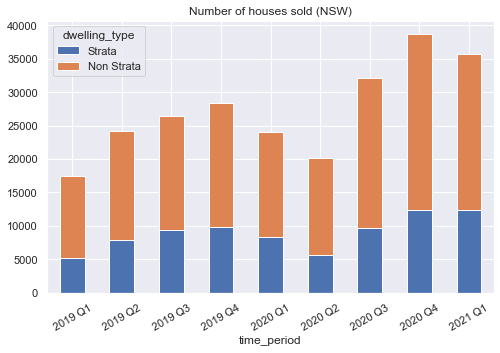

In [58]:
# Visualisation
sales_num_plot = sales_num[['Strata', 'Non Strata']]


sales_num_plot.plot(kind='bar', stacked=True,
                    title = "Number of houses sold (NSW)",
                    legend=True,
                    figsize=(8,5), 
                    rot=30)


#### B. <u>Total level trends - average house price</u> ####
Key observations:
* Total (Strata + non-Strata) average price has been **trending up since Q1 2020** despite COVID
* And this upward trend has been **driven by non-Strata houses**, the price of which have rocketed since Q2 2020
* Strata properties (more likely to be apartment units/condos, terrace houses with shared common areas) on the contrary saw moderate increase in price in Q2'20 then falling flat

See [here](https://www.macquarie.com.au/home-loans/strata-properties-pros-and-cons.html) for more informatino on difference of Strata and non-strata property. 

**THIS IS IMPORTANT: suggesting that Strata and non-Strata house prices behave very diffirently and should probably be looked at separately in later regression analysis**

In [61]:
# Look at changes in average price
price_mean = s_master.groupby(['time_period', 'dwelling_type'])['mean_price'].mean().unstack()
price_mean.round(2)

dwelling_type,Non Strata,Strata,Total
time_period,,,
2019 Q1,926.16,790.45,842.79
2019 Q2,1004.40,893.82,911.26
2019 Q3,1049.54,914.90,950.79
2019 Q4,1098.49,843.27,943.41
2020 Q1,1090.61,769.84,910.23
2020 Q2,1049.71,814.68,918.45
2020 Q3,1093.92,798.71,929.96
2020 Q4,1144.03,806.56,964.60
2021 Q1,1226.11,828.78,997.60


Text(0.5, 0, '')

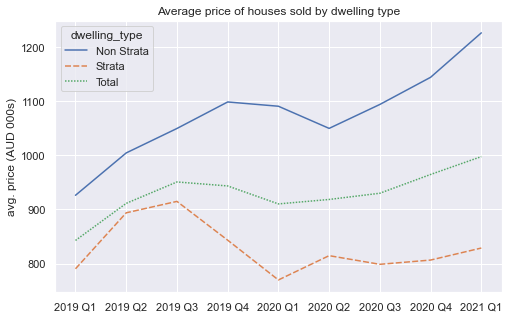

In [76]:
# Visualisation - avg. price line chart
plt.figure(figsize=(8,5))
ax = sns.lineplot(data=price_mean)
ax.set_title("Average price of houses sold by dwelling type")
ax.set_ylabel("avg. price (AUD 000s)")
ax.set_xlabel(None)

In [79]:
# Look at changes in median price to reduce the impact of potential outliers
price_median = s_master.groupby(['time_period', 'dwelling_type'])['mean_price'].median().unstack()
price_median.round(2)

dwelling_type,Non Strata,Strata,Total
time_period,,,
2019 Q1,720.0,706.0,701.5
2019 Q2,750.0,693.0,702.0
2019 Q3,785.0,696.0,753.0
2019 Q4,803.5,702.0,753.0
2020 Q1,794.5,692.0,760.0
2020 Q2,784.0,739.5,775.0
2020 Q3,815.5,709.5,763.0
2020 Q4,837.5,710.5,774.0
2021 Q1,888.0,712.5,801.5


Text(0.5, 0, '')

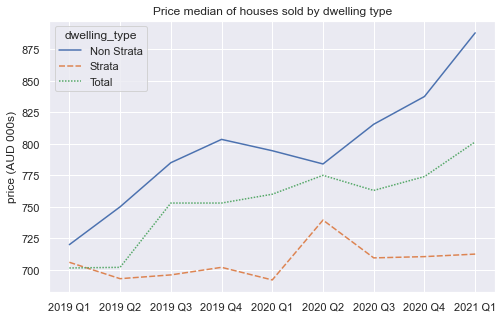

In [80]:
# Visualisation - median price line chart

plt.figure(figsize=(8,5))
ax = sns.lineplot(data=price_median)
ax.set_title("Price median of houses sold by dwelling type")
ax.set_ylabel("price (AUD 000s)")
ax.set_xlabel(None)

# Rent data

In [ ]:
rent = "Files/Rent/Issue-135-Rent-tables-March-2021-quarter.xlsx"
rent_pc = pd.read_excel(rent, sheet_name="Postcode", na_values='-', header=7)

In [ ]:
# Rename column for easier referencing (rent)

rename_cols= {'Postcode':'postcode', 
             'Dwelling Types':'dwelling_type', 
              'Number of Bedrooms':'bed_number',
             'First Quartile Weekly Rent for New Bonds\n$': '25%_wrent_newb',
             'Median Weekly Rent for New Bonds\n$': '50%_wrent_newb', 
             'Third Quartile Weekly Rent for New Bonds\n$': "75%_wrent_newb",
             'New Bonds Lodged\nNo.' : 'new_bonds_number',
              'Total Bonds Held\nNo.': 'total_bonds_number',
             'Sales\nNo.':'sales_number'}

rent_pc.rename(columns=rename_cols,inplace=True)
rent_pc.head(5)

In [ ]:
# Check data types
rent_pc.dtypes

In [ ]:
rent_pc.loc[rent_pc['new_bonds_number'] == 's', 'new_bonds_number'] = 20.0
rent_pc.loc[rent_pc['total_bonds_number'] == 's', 'total_bonds_number'] = 20.0

rent_pc['new_bonds_number'] = rent_pc['new_bonds_number'].astype(float)
rent_pc['total_bonds_number'] = rent_pc['total_bonds_number'].astype(float)

# Check data types again
rent_pc.dtypes

In [ ]:
# Check unique values of dwelling type
rent_pc.groupby('dwelling_type').size()

In [ ]:
# Check unique values of bed_number
rent_pc.groupby('bed_number').size()

In [ ]:
# checking shape of rent_pc and null values

print(rent_pc.shape, "\n")
print(rent_pc.isnull().sum())

In [ ]:
# Check top 20 postcodes that have higest total bond number in Q1 2021
tbonds_pc = rent_pc.groupby(["postcode", "dwelling_type"])['total_bonds_number'].sum().unstack()

tbonds_pc.sort_values(by="Total", ascending = False).head(20)

In [ ]:
nbonds_pc = rent_pc.groupby(["postcode", "dwelling_type"])['new_bonds_number'].sum().unstack()
nbonds_pc.sort_values(by='Total', ascending = False).head(20)